# 1. Twitch API data

The URL `https://wind-bow.glitch.me/twitch-api/channels/{CHANNEL_NAME}` is an API from twitch to get data from twitch channels.

Get the data from the following channels:

```
["ESL_SC2", "OgamingSC2", "cretetion", "freecodecamp", 
    "storbeck", "habathcx", "RobotCaleb", "noobs2ninjas",
    "ninja", "shroud", "Dakotaz", "esltv_cs", "pokimane", 
    "tsm_bjergsen", "boxbox", "wtcn", "a_seagull",
    "kinggothalion", "amazhs", "jahrein", "thenadeshot", 
    "sivhd", "kingrichard"]
```

To make into a dataframe that looks like this:

![](twitch.png)

In [1]:
import requests
import json
import pandas as pd
channels = ["ESL_SC2", "OgamingSC2", "cretetion", "freecodecamp", 
    "storbeck", "habathcx", "RobotCaleb", "noobs2ninjas",
    "ninja", "shroud", "Dakotaz", "esltv_cs", "pokimane", 
    "tsm_bjergsen", "boxbox", "wtcn", "a_seagull",
    "kinggothalion", "amazhs", "jahrein", "thenadeshot", 
    "sivhd", "kingrichard"]

In [2]:
appended_data = []
for c in channels:
    r = requests.get(f"https://wind-bow.glitch.me/twitch-api/channels/{c}")
    # print(r.status_code)
    if r.status_code == 200:
        #print(c)
        df = pd.DataFrame.from_dict(json.loads(r.content))
        appended_data.append(df)
appended_data = pd.concat(appended_data)
appended_data = appended_data.loc['self',['_id','display_name','status','followers','views']]
appended_data.reset_index(inplace=True)
appended_data.drop(columns='index')

,_id,display_name,status,followers,views
0,30220059,ESL_SC2,RERUN: StarCraft 2 - Terminator vs. Parting (P...,135394,60991791
1,71852806,OgamingSC2,UnderDogs - Rediffusion - Qualifier.,40895,20694507
2,90401618,cretetion,It's a Divison kind of Day,908,11631
3,79776140,FreeCodeCamp,Greg working on Electron-Vue boilerplate w/ Ak...,10122,163747
4,86238744,storbeck,None,10,1019
5,6726509,Habathcx,Massively Effective,14,764
6,54925078,RobotCaleb,Code wrangling,20,4602
7,82534701,noobs2ninjas,Building a new hackintosh for #programming and...,835,48102


# 2. App Store Reviews

The Apple app store has a `GET` API to get reviews on apps. The URL is:

```
https://itunes.apple.com/{COUNTRY_CODE}/rss/customerreviews/id={APP_ID_HERE}/page={PAGE_NUMBER}/sortby=mostrecent/json
```

Note that you need to provide:

- The country code (eg. `'us'`, `'gb'`, `'ca'`, `'au'`) 

- The app ID. This can be found in the web page for the app right after `id`. For instance, Candy Crush's US webpage is:

`https://apps.apple.com/us/app/candy-crush-saga/id553834731`

So here the ID would be `553834731`.

- The "Page Number". The request responds with multiple pages of data, but sends them one at a time. So you can cycle through the data pages for any app on any country.

### 2.1 English app reviews

Get all english reviews you can for Candy Crush, Tinder, the Facebook app and Twitter (you have to get them from all the english-speaking countries you can think of!).

### 2.2 Best version

For each app, get the version that is the best rated.

Make a visualization of the ratings per versions per app to show this.

### 2.3 Top words

Which word for each app is most common in the 5 star and in the 1-star review's titles?

Note: `df.title.str.get_dummies()` is your friend

Note: This might create a lot of data! Try to break down your analysis in chunks if it doesn't work.

In [3]:
# Candy Crush : 553834731
# Tinder : 547702041
# Facebook : 284882215
# Twitter : 333903271

In [4]:
# 2-1 : English app reviews
# Get all english reviews you can for Candy Crush, Tinder, the Facebook app and Twitter (you have to get them from all the english-speaking countries you can think of!

final = []
co = ['us', 'gb', 'ca', 'au']
app_id = [553834731,547702041,284882215,333903271]
add_name = ['Candy Crush','Tinder','Facebook','Twitter']
apps = dict(zip(app_id, add_name))

pp = 1
for c in co:
    pp = 1
    for app in apps:
        try:
            r = requests.get(f"https://itunes.apple.com/{c}/rss/customerreviews/id={app}/page={pp}/sortby=mostrecent/json")
            cc = json.loads(r.content)
            if r.status_code == 200:
                for i in cc['feed']['entry']:
                    final.append((apps[app],app,c,i['content']['label']))
            pp += 1
        except:
            print('error')

df = pd.DataFrame(final)
df.columns=['app','app_id','country','eng_review']
df

,app,app_id,country,eng_review
0,Candy Crush,553834731,us,For weeks now I have not been able to get the ...
1,Candy Crush,553834731,us,I love the game cos it’s super amazing and lov...
2,Candy Crush,553834731,us,App keeps freezing on the loading screen on iP...
3,Candy Crush,553834731,us,an excilant game
4,Candy Crush,553834731,us,I enjoy this game & have got to the end and wa...
...,...,...,...,...
795,Twitter,333903271,au,I’ve been on Twitter for 10 years and I’ve nev...
796,Twitter,333903271,au,Stop censoring mainstream political leaders.
797,Twitter,333903271,au,Garbage app that relies on the extreme views o...
798,Twitter,333903271,au,This app censors political opinions that diffe...


In [5]:
# 2-2 : Best Version
# For each app, get the version that is the best rated.

final = []
co = ['us', 'gb', 'ca', 'au']
app_id = [553834731,547702041,284882215,333903271]
add_name = ['Candy Crush','Tinder','Facebook','Twitter']
apps = dict(zip(app_id, add_name))

pp = 1
for c in co:
    pp = 1
    for app in apps:
        try:
            r = requests.get(f"https://itunes.apple.com/{c}/rss/customerreviews/id={app}/page={pp}/sortby=mostrecent/json")
            cc = json.loads(r.content)
            if r.status_code == 200:
                for i in cc['feed']['entry']:
                    final.append((apps[app],app,c,i['im:version']['label'],i['im:rating']['label']))
            pp += 1
        except:
            print('error')

df = pd.DataFrame(final)
df.columns=['app','app_id','country','version','rating']
df['rating'] = df['rating'].astype(int)
df['version'] = df['version'].astype(str)
df

,app,app_id,country,version,rating
0,Candy Crush,553834731,us,1.196.1.1,1
1,Candy Crush,553834731,us,1.196.1.1,5
2,Candy Crush,553834731,us,1.196.1.1,1
3,Candy Crush,553834731,us,1.196.1.1,5
4,Candy Crush,553834731,us,1.196.1.1,1
...,...,...,...,...,...
795,Twitter,333903271,au,8.48,1
796,Twitter,333903271,au,8.48,1
797,Twitter,333903271,au,8.48,1
798,Twitter,333903271,au,8.48,1


In [6]:
# version that is best rated by app
df_avg = df.groupby(['app','version'],as_index=False).agg({'rating':'mean'}).sort_values('rating',ascending=False)
df_avg = df_avg.reset_index(drop=True)
df_avg

,app,version,rating
0,Twitter,8.52.1,3.500000
1,Candy Crush,1.193.0.2,3.166667
2,Candy Crush,1.196.0.1,3.021277
3,Candy Crush,1.194.0.2,2.862069
4,Twitter,8.54.5,2.840000
5,Candy Crush,1.196.1.1,2.632353
6,Candy Crush,1.195.1.1,2.435897
7,Twitter,8.52,2.344828
8,Candy Crush,1.192.0.1,2.272727
9,Twitter,8.51,1.934426


In [7]:
idx = df_avg.groupby(['app'])['rating'].transform(max) == df_avg['rating']
df_best = df_avg[idx]
df_best = df_best.reset_index(drop=True)
df_best

,app,version,rating
0,Twitter,8.52.1,3.500000
1,Candy Crush,1.193.0.2,3.166667
2,Tinder,12.2.0,1.720000
3,Facebook,307.0,1.360000


Text(0.5, 1.0, 'Facebook Average Rating by Version')

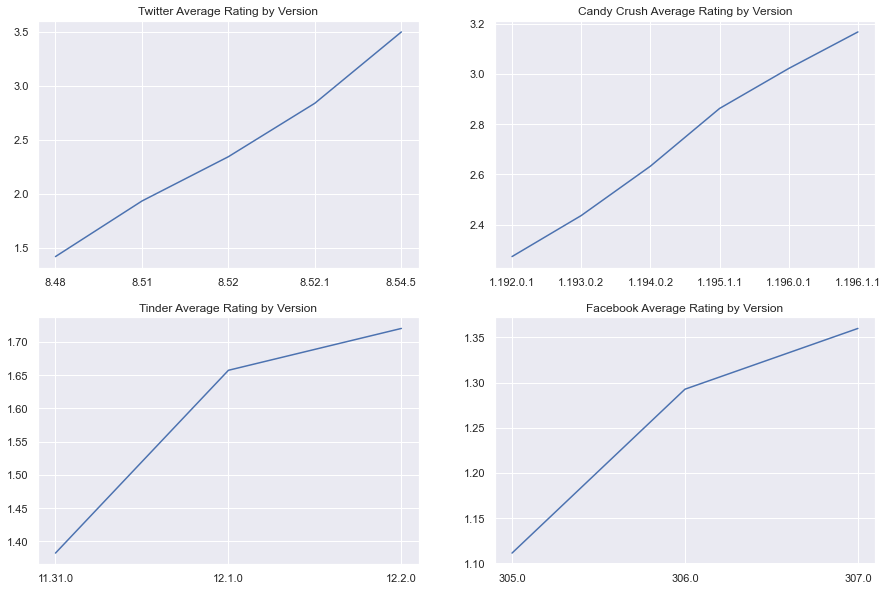

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from distutils.version import StrictVersion
sns.set()

fig, ax = plt.subplots(2,2, figsize = (15, 10))

ax[0,0].plot(sorted(df_avg[df_avg['app']=='Twitter']['version'], key=StrictVersion),df_avg[df_avg['app']=='Twitter']['rating'].sort_values(ascending=True))
ax[0,0].set_title('Twitter Average Rating by Version')


ax[0,1].plot(sorted(df_avg[df_avg['app']=='Candy Crush']['version']),(df_avg[df_avg['app']=='Candy Crush']['rating'].sort_values(ascending=True)))
ax[0,1].set_title('Candy Crush Average Rating by Version')


ax[1,0].plot(sorted(df_avg[df_avg['app']=='Tinder']['version'], key=StrictVersion),df_avg[df_avg['app']=='Tinder']['rating'].sort_values(ascending=True))
ax[1,0].set_title('Tinder Average Rating by Version')


ax[1,1].plot(sorted(df_avg[df_avg['app']=='Facebook']['version'], key=StrictVersion),df_avg[df_avg['app']=='Facebook']['rating'].sort_values(ascending=True))
ax[1,1].set_title('Facebook Average Rating by Version')

In [9]:
# 2-3 : Top Words

rating_1 = []
rating_5 = []

co = ['us', 'gb', 'ca', 'au']
app_id = [553834731,547702041,284882215,333903271]
add_name = ['Candy Crush','Tinder','Facebook','Twitter']
apps = dict(zip(app_id, add_name))

pp = 1
for c in co:
    pp = 1
    for app in apps:
        try:
            r = requests.get(f"https://itunes.apple.com/{c}/rss/customerreviews/id={app}/page={pp}/sortby=mostrecent/json")
            cc = json.loads(r.content)
            if r.status_code == 200:
                for i in cc['feed']['entry']:
                    if i['im:rating']['label'] == '5':
                        rating_5.append((app,i['title']['label']))
                    if i['im:rating']['label'] == '1' : 
                        rating_1.append((app,i['title']['label']))    
            pp += 1
        except:
            print('error')
            
df_1star = pd.DataFrame(rating_1)
df_5stars = pd.DataFrame(rating_5)

df_1star.columns=['app_id','title']
df_5stars.columns=['app_id','title']

df_1star = df_1star.join(df_1star.title.str.get_dummies(' '))
df_1star.drop('title',axis=1, inplace=True)
df_1star

df_5stars = df_5stars.join(df_5stars.title.str.get_dummies(' '))
df_5stars.drop('title',axis=1, inplace=True)
df_5stars

,app_id,!!!!!!,!!!!!!!,$200,-success,..,5,ALL,AMAZING,AMQCATARACTS,...,with,working,years,you,you'll,you're,your,很好,🔐,😍
0,553834731,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,553834731,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,553834731,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,553834731,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,553834731,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,333903271,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
114,333903271,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
115,333903271,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
116,333903271,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# Most common word, 1 star rating

print('Candy Crush: the most common word is:',df_1star.loc[df_1star.app_id==553834731].sum().sort_values(ascending=False)[1:2]) 
print('Tinder: the most common word is:',df_1star.loc[df_1star.app_id==547702041].sum().sort_values(ascending=False)[1:2])
print('Facebook: the most common word is:',df_1star.loc[df_1star.app_id==284882215].sum().sort_values(ascending=False)[1:2])
print('Twitter: the most common word is:',df_1star.loc[df_1star.app_id==333903271].sum().sort_values(ascending=False)[1:2])

Candy Crush: the most common word is: game    9
dtype: int64
Tinder: the most common word is: no    18
dtype: int64
Facebook: the most common word is: Censorship    21
dtype: int64
Twitter: the most common word is: accounts    17
dtype: int64


In [11]:
# Most common word, 5 star rating

print('Candy Crush: the most common word is:',df_5stars.loc[df_5stars.app_id==553834731].sum().sort_values(ascending=False)[1:2] ) 
print('Tinder: the most common word is:',df_5stars.loc[df_5stars.app_id==547702041].sum().sort_values(ascending=False)[1:2])
print('Facebook: the most common word is:',df_5stars.loc[df_5stars.app_id==284882215].sum().sort_values(ascending=False)[1:2])
print('Twitter: the most common word is:',df_5stars.loc[df_5stars.app_id==333903271].sum().sort_values(ascending=False)[1:2])

Candy Crush: the most common word is: game    9
dtype: int64
Tinder: the most common word is: I    2
dtype: int64
Facebook: the most common word is: Holà    1
dtype: int64
Twitter: the most common word is: Twitter    5
dtype: int64


# 3 (STRETCH) IMDB scraping

IMDB has structured web pages. We can exploit this to scrape movie data.

Usinf the following URL:

`https://www.imdb.com/search/title/?groups=top_1000&start={PAGE_NUMBER}&ref_=adv_nxt`

With the following headers in your `GET` request: `{"Accept-Language": "en-US,en;q=0.5"}`

You can generate a dataframe like this one by cycling over the page numbers in the URL requested:

![](IMDB.png)

Note that the following  page attribues will be of interest:

- `div` with a class of `lister-item mode-advanced`

- Various `span` objects within that `div` like `lister-item-year` and `runtime` and `metascore`